# Fracción de galaxias por grupo

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from collections import Counter
import numpy as np
from itertools import cycle, islice

import numpy as np
np.random.seed(0)

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../../../data/tab_gal_gru.dat'
df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs', 'pasiva', 'early' ])

# , 'g_ps', 'g_early'
## g_ps= pasiva
## g_early early

id_gc_gal_grup = df.ngc.to_list()

path = '../../../data/compact_in_all'

df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

In [4]:
display(df.describe())

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2.070000e+03,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,233.122222,2.815459,190.252702,27.723103,0.042794,15.328896,16.088230,19.221081,1.237662e+18,0.501974,8.205420,-20.119825,-19.393180,-17.826410,0.704831,0.654106
std,134.431496,1.413787,37.849984,17.522322,0.017825,1.239176,1.217238,0.958491,5.612076e+12,20.086786,22.942260,1.142499,1.103947,1.002199,0.456229,0.475774
min,1.000000,1.000000,114.819000,-2.909000,0.002870,10.587000,11.410000,14.371000,1.237649e+18,-99.900002,-99.900002,-23.296690,-22.479040,-20.750630,0.000000,0.000000
25%,117.000000,2.000000,159.006250,13.427000,0.029774,14.415750,15.208000,18.637000,1.237658e+18,2.292826,6.283710,-20.931423,-20.158278,-18.522187,0.000000,0.000000
50%,234.000000,3.000000,188.987500,25.902500,0.039709,15.404500,16.131500,19.281500,1.237662e+18,3.522022,9.721042,-20.043260,-19.329500,-17.777480,1.000000,1.000000
75%,350.000000,4.000000,222.705750,40.907250,0.053250,16.334000,17.077000,19.913500,1.237666e+18,5.472989,15.541295,-19.317550,-18.657383,-17.123495,1.000000,1.000000
max,462.000000,8.000000,256.520000,67.384000,0.122845,17.691000,19.699000,24.514000,1.237675e+18,35.702702,80.721657,-16.650920,-9.894290,-11.328430,1.000000,1.000000


**Lista de GCs descartandos por corte de Magnitud**

In [5]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

In [6]:
df.shape

(2012, 15)

In [7]:
df = df.reset_index()

**Visualización y Curación**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ngc     2012 non-null   int64  
 1   nk      2012 non-null   int64  
 2   alg     2012 non-null   float64
 3   delg    2012 non-null   float64
 4   zred    2012 non-null   float64
 5   rmag    2012 non-null   float64
 6   gmag    2012 non-null   float64
 7   umag    2012 non-null   float64
 8   gal_ID  2012 non-null   int64  
 9   r50     2012 non-null   float64
 10  r90     2012 non-null   float64
 11  r_abs   2012 non-null   float64
 12  g_abs   2012 non-null   float64
 13  u_abs   2012 non-null   float64
 14  pasiva  2012 non-null   int64  
 15  early   2012 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 251.6 KB


None

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,233.149602,2.817097,190.201947,27.638412,0.043493,15.373400,16.135362,19.211730,1.237662e+18,0.744808,8.323654,-20.157619,-19.428971,-17.858869,0.705268,0.658549
std,135.447818,1.416794,38.163741,17.374560,0.016899,1.190321,1.163361,0.961769,5.617701e+12,19.165742,21.871240,1.115163,1.079241,0.979605,0.456035,0.474314
min,1.000000,1.000000,114.819000,-2.909000,0.012309,11.471000,12.307000,14.371000,1.237649e+18,-99.900002,-99.900002,-23.270410,-22.388150,-20.750630,0.000000,0.000000
25%,115.000000,2.000000,158.595500,13.501000,0.030553,14.451000,15.250000,18.622500,1.237658e+18,2.289818,6.279412,-20.948863,-20.192290,-18.537957,0.000000,0.000000
50%,236.000000,3.000000,189.313000,26.007500,0.040377,15.443000,16.172000,19.278500,1.237662e+18,3.489711,9.631056,-20.079295,-19.348950,-17.805575,1.000000,1.000000
75%,352.000000,4.000000,223.070500,40.750000,0.053595,16.343500,17.089750,19.895750,1.237666e+18,5.379437,15.301372,-19.360315,-18.674310,-17.147540,1.000000,1.000000
max,462.000000,8.000000,256.520000,66.738000,0.100278,17.668000,19.699000,24.514000,1.237675e+18,35.702702,80.721657,-17.060260,-9.894290,-11.328430,1.000000,1.000000


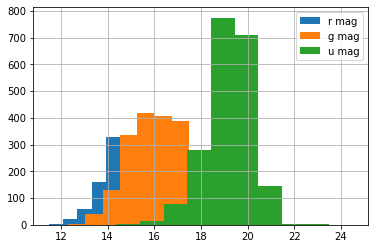

In [8]:
display(df.info())
display(df.describe())
#'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs'
df.rmag.hist(label='r mag')
df.gmag.hist(label='g mag')
df.umag.hist(label='u mag')

plt.legend()

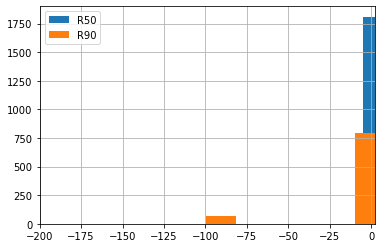

In [9]:
df.r50.hist(label='R50')
df.r90.hist(label='R90')
plt.xlim(-200, 2)

plt.legend()

In [10]:
df_r50 = df[df['r50'] == -1000].copy()
display(df_r50.shape)
df_r50

(0, 16)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early


In [11]:
df_r90 = df[df['r90'] == -1000].copy()
display(df_r90.shape)
df_r90

(0, 16)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early


**Cantidad de pasivas por grupo**

In [12]:
df_pasivas = df.groupby(["ngc"])["pasiva"].sum()

In [13]:
len(df_pasivas.values)

449

In [14]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

,ngc,pasiva
0,1,3
1,2,4


**Match**

In [15]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [16]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [17]:
df_final = df1_sort.join(df_pasivas_sort)

In [18]:
df_final.shape

(449, 18)

In [19]:
df_final.tail()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target,ngc,pasiva
444,458,7,243.981,38.537,0.034782,6.091,26.202,138.779,14.577,1,-20.570,0.103047,0.067340,91.589798,-20.088,Field,458,3
445,459,4,244.410,50.641,0.041362,4.748,25.610,552.432,14.146,1,-21.441,0.099180,0.016282,84.761040,-20.121,Loose,459,3
446,460,5,245.283,13.159,0.034352,3.715,24.912,247.585,14.328,1,-20.778,0.079042,0.028953,55.171383,-19.839,Loose,460,3
447,461,4,247.547,36.247,0.075265,3.671,25.664,383.398,14.479,1,-22.477,0.160493,0.037964,118.280334,-20.026,Field,461,3
448,462,5,250.332,13.424,0.050796,4.130,24.858,268.188,13.764,1,-22.276,0.112063,0.037895,90.346329,-21.427,Loose,462,5


In [20]:
df_final.columns

Index(['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b',
       'flag', 'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target', 'ngc',
       'pasiva'],
      dtype='object')

In [21]:
#df_final.to_csv('df_pasiva.csv', index=False)

In [22]:
df_final['pasiva'].iloc[0]/df_final['n_m'].iloc[0]

0.75

In [23]:
frecuencia = []
for i in range(df_final.shape[0]):
    frac = df_final.pasiva.iloc[i]/df_final.n_m.iloc[i]
    frecuencia.append(frac)

In [24]:
len(frecuencia)

449

In [25]:
frecu_03 = list(map(lambda x: round(x, 3), frecuencia))

In [26]:
len(frecu_03)

449

In [27]:
df_final['frac'] = frecu_03

In [28]:
clases = list(set(df_final.Target))
clases = ['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']
#['Node', 'VoiR', 'Loose', 'Field', 'FIl', 'VoiS']

### Fracción de galaxias pasivas sin distinguir por entorno

<AxesSubplot:>

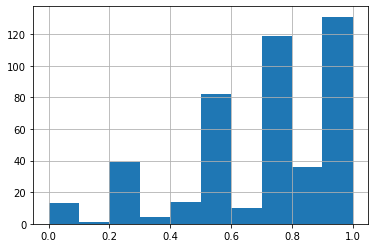

In [29]:
df_final.frac.hist()

In [30]:
clases

['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']

### Diagrama de barras  de fracción de  galaxias pasivas por entorno

<Figure size 1440x5760 with 0 Axes>

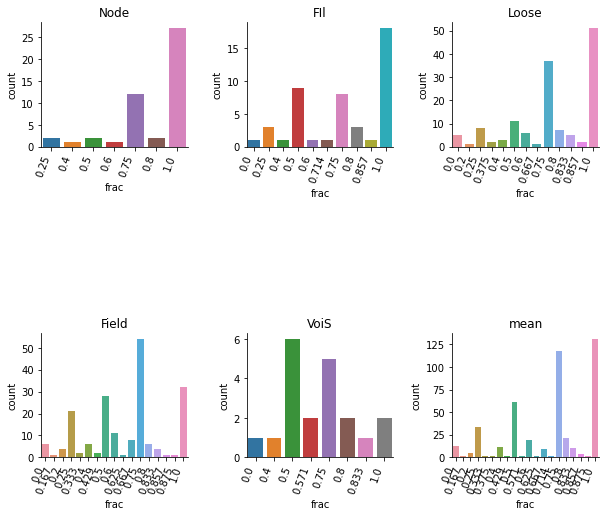

In [31]:
plt.rcParams['figure.figsize'] = 10, 8
plt.figure(figsize=(20,80))


####subfiguras
f, ax = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.5)

df_bar = df_final[df_final['Target']==clases[0]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
ax[0,0].set_title(clases[0])


df_bar = df_final[df_final['Target']==clases[1]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,1].set_title(clases[1])



df_bar = df_final[df_final['Target']==clases[2]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,2].set_title(clases[2])



df_bar = df_final[df_final['Target']==clases[3]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,0].set_title(clases[3])


df_bar = df_final[df_final['Target']==clases[4]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,1].set_title(clases[4])


sns.countplot(x="frac", data= df_final, ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,2].set_title('mean')

#plt.savefig('bar_frac.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [32]:
df_final[df_final['Target']==clases[0]].shape

(47, 19)

In [33]:
frac_index = list(set(df_final.frac))

### Diagrama de barras  de fracción de  galaxias pasivas por entorno

<ipython-input-34-fa29ae1231a9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
<ipython-input-34-fa29ae1231a9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
<ipython-input-34-fa29ae1231a9>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
<ipython-input-34-fa29ae1231a9>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
<ipython-input-34-fa29ae1231a9>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
<ipython-input-34-fa29ae1231a9>:46: UserWarning: FixedF

<Figure size 1440x5760 with 0 Axes>

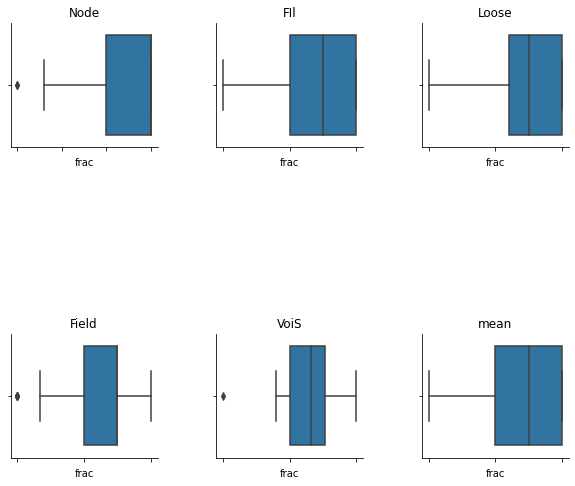

In [34]:
plt.figure(figsize=(20,80))


####subfiguras
f, ax = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.5)

df_bar = df_final[df_final['Target']==clases[0]].sort_values('frac')
sns.boxplot(x="frac", data=df_bar, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
ax[0,0].set_title(clases[0])


df_bar = df_final[df_final['Target']==clases[1]].sort_values('frac')
sns.boxplot(x="frac", data=df_bar, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,1].set_title(clases[1])



df_bar = df_final[df_final['Target']==clases[2]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,2].set_title(clases[2])



df_bar = df_final[df_final['Target']==clases[3]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,0].set_title(clases[3])


df_bar = df_final[df_final['Target']==clases[4]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,1].set_title(clases[4])


sns.boxplot(x="frac", data= df_final, ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,2].set_title('mean')

#plt.savefig('hist_box.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

Text(0, 0.5, 'fraction of passive galaxies')

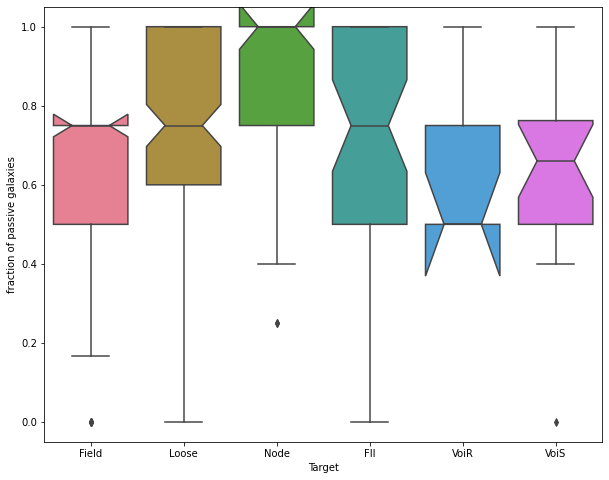

In [35]:
sns.boxplot(x='Target', y="frac", data=df_final,  palette="husl", notch= True)
plt.ylabel('fraction of passive galaxies')
#plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

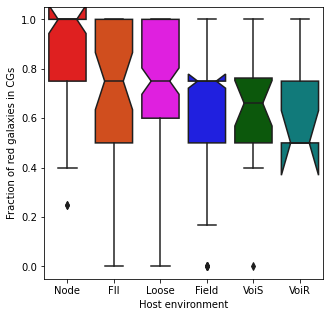

In [36]:
plt.figure(figsize=(5,5))
my_pal = {"Node":"red","FIl":"#EE4000", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"#008B8B"}
sns.boxplot(x=df_final.Target, y=df_final.frac, notch= True, order=[ 
                 'Node',  'FIl', 'Loose', 'Field', 'VoiS', 'VoiR'], palette=my_pal)
#, width=[0.5, 0.2, 1, 0.8, 0.4, 0.3]
plt.ylabel('Fraction of red galaxies in CGs')
plt.xlabel('Host environment')
plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

In [37]:
df_final[df_final['Target']==clases[0]].shape

(47, 19)

In [38]:
set(df_final.Target)

{'FIl', 'Field', 'Loose', 'Node', 'VoiR', 'VoiS'}

In [39]:
from matplotlib.cbook import boxplot_stats

In [40]:
Node = df_final[df_final['Target']=='Node']
display('Node-frac')
display(boxplot_stats(Node.frac)[0]['med'],
boxplot_stats(Node.frac)[0]['cihi']-boxplot_stats(Node.frac)[0]['med'])

FIl = df_final[df_final['Target']=='FIl']
display('FIl-frac')
display(boxplot_stats(FIl.frac)[0]['med'],
boxplot_stats(FIl.frac)[0]['cihi']-boxplot_stats(FIl.frac)[0]['med'])

Loose = df_final[df_final['Target']=='Loose']
display('Loose-frac')
display(boxplot_stats(Loose.frac)[0]['med'],
boxplot_stats(Loose.frac)[0]['cihi']-boxplot_stats(Loose.frac)[0]['med'])

Field = df_final[df_final['Target']=='Field']
display('Field-frac')
display(boxplot_stats(Field.frac)[0]['med'],
boxplot_stats(Field.frac)[0]['cihi']-boxplot_stats(Field.frac)[0]['med'])

VoiS = df_final[df_final['Target']=='VoiS']
display('VoiS-frac')
display(boxplot_stats(VoiS.frac)[0]['med'],
boxplot_stats(VoiS.frac)[0]['cihi']-boxplot_stats(VoiS.frac)[0]['med'])

VoiR = df_final[df_final['Target']=='VoiR']
display('VoiR-frac')
display(boxplot_stats(VoiR.frac)[0]['med'],
boxplot_stats(VoiR.frac)[0]['cihi']-boxplot_stats(VoiR.frac)[0]['med'])

'Node-frac'

1.0

0.05725200916292361

'FIl-frac'

0.75

0.11574193558159429

'Loose-frac'

0.75

0.05326626478390217

'Field-frac'

0.75

0.028626004581461806

'VoiS-frac'

0.6605

0.09215395152271011

'VoiR-frac'

0.5

0.13083333333333336

# Tomando 7 GCs de forma aleatoria de cada entorno. 

**Submuestras**

In [41]:
df_final[df_final['Target']==clases[0]].shape

(47, 19)

# Misma figura pero sin considerar submuestras

In [42]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
dfa_c0 = pd.DataFrame(df_c0.frac.values) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden
display(dfa_c0.shape)

df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
dfa_c1 = pd.DataFrame(df_c1.frac.values)


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
dfa_c2 = pd.DataFrame(df_c2.frac.values)


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
dfa_c3 = pd.DataFrame(df_c3.frac.values)


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
dfa_c4 = pd.DataFrame(df_c4.frac.values)


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
dfa_c5 = pd.DataFrame(df_c5.frac.values)

#########################################################################################
Node = pd.DataFrame(Counter(df_c0.frac).values(), index=Counter(df_c0.frac).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_c1.frac).values(), index=Counter(df_c1.frac).keys(), columns=['FIl'])
Loose = pd.DataFrame(Counter(df_c2.frac).values(), index=Counter(df_c2.frac).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_c3.frac).values(), index=Counter(df_c3.frac).keys(), columns=['Field'])
VoiS = pd.DataFrame(Counter(df_c4.frac).values(), index=Counter(df_c4.frac).keys(), columns=['VoiS'])
VoiR = pd.DataFrame(Counter(df_c5.frac).values(), index=Counter(df_c5.frac).keys(), columns=['VoiR'])

#'Node', 'Fil', 'Loose', 'Field', 'VoidS', 'VoidR'
df_12_19 = pd.concat([Node, FIl, Loose, Field, VoiS, VoiR], axis=1)
display(df_12_19.head(2))

(47, 1)

,Node,FIl,Loose,Field,VoiS,VoiR
0.000,NaN,1.0,5.0,6.0,1.0,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN


In [43]:
df_12_19.VoiS.shape

(20,)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.167'),
  Text(2, 0, '0.2'),
  Text(3, 0, '0.25'),
  Text(4, 0, '0.333'),
  Text(5, 0, '0.375'),
  Text(6, 0, '0.4'),
  Text(7, 0, '0.429'),
  Text(8, 0, '0.5'),
  Text(9, 0, '0.571'),
  Text(10, 0, '0.6'),
  Text(11, 0, '0.625'),
  Text(12, 0, '0.667'),
  Text(13, 0, '0.714'),
  Text(14, 0, '0.75'),
  Text(15, 0, '0.8'),
  Text(16, 0, '0.833'),
  Text(17, 0, '0.857'),
  Text(18, 0, '0.875'),
  Text(19, 0, '1.0')])

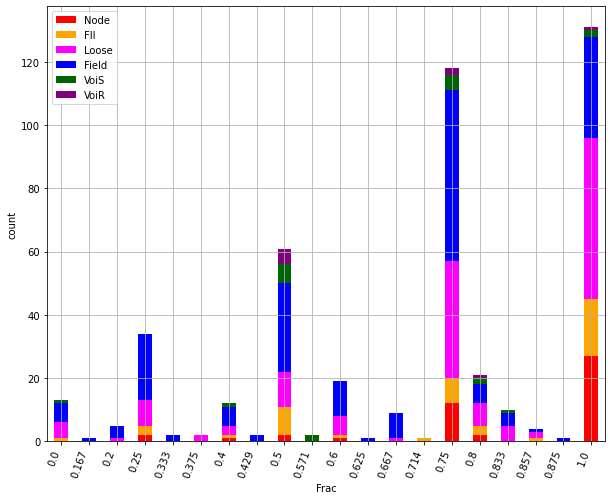

In [44]:
# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_19)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12_19.plot(kind='bar', stacked=True, color=my_colors, grid=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=70, ha="right")
#plt.xlim(0., 0.4)
#plt.savefig('cg1219.eps',format='eps')


In [45]:
df_12_19.head(2)

,Node,FIl,Loose,Field,VoiS,VoiR
0.000,NaN,1.0,5.0,6.0,1.0,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN


In [46]:
df_12_22 = df_12_19.reset_index().copy()
df_12_22 = df_12_22.rename(columns={'index': 'frac'})
df_12_22 = df_12_22.fillna(0)
df_12_22.head(2)

,frac,Node,FIl,Loose,Field,VoiS,VoiR
0,0.000,0.0,1.0,5.0,6.0,1.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0


https://kodlogs.com/33984/the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous-use-a-any-or-a-all

In [47]:
df_12_22

,frac,Node,FIl,Loose,Field,VoiS,VoiR
0,0.000,0.0,1.0,5.0,6.0,1.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0
2,0.200,0.0,0.0,1.0,4.0,0.0,0.0
3,0.250,2.0,3.0,8.0,21.0,0.0,0.0
4,0.333,0.0,0.0,0.0,2.0,0.0,0.0
5,0.375,0.0,0.0,2.0,0.0,0.0,0.0
6,0.400,1.0,1.0,3.0,6.0,1.0,0.0
7,0.429,0.0,0.0,0.0,2.0,0.0,0.0
8,0.500,2.0,9.0,11.0,28.0,6.0,5.0
9,0.571,0.0,0.0,0.0,0.0,2.0,0.0


In [48]:
# Binning of the data based on a condition
df_12_22.loc[df_12_22.frac < 0.25, 'frac'] = 10
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.25, df_12_22.frac < 0.5), 'frac'] = 20
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.5, df_12_22.frac < 0.75), 'frac'] = 30
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.75, df_12_22.frac <= 1.0), 'frac'] = 40
#df_12_22.loc[np.logical_and(df_12_22.frac >= 0.8, df_12_22.frac <= 1.0), 'frac'] = 50
 
# Grouping and couting
df_12_22 = df_12_22.groupby('frac').sum()

In [49]:
df_12_22

,Node,FIl,Loose,Field,VoiS,VoiR
frac,,,,,,
10.0,0.0,1.0,6.0,11.0,1.0,0.0
20.0,3.0,4.0,13.0,31.0,1.0,0.0
30.0,3.0,11.0,18.0,48.0,8.0,5.0
40.0,41.0,30.0,102.0,98.0,10.0,4.0


In [50]:
#bines = ['bin 1', 'bin 2', 'bin 3', 'bin 4', 'bin 5' ]
#bines = ['[0 - 0.2)', '[0.2 - 0.4)', '[0.4 - 0.6)', '[0.6 - 0.8)', '[0.8 - 1]' ]
bines = ['[0 - 0.25)', '[0.25 - 0.5)', '[0.5 - 0.75)', '[0.75 - 1]']

In [51]:
df_12_22['bines'] = bines

In [52]:
df_fracciones_bin =  df_12_22.reset_index().set_index('bines').drop('frac', axis=1)

In [53]:
df_fracciones_bin 

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.0,1.0,6.0,11.0,1.0,0.0
[0.25 - 0.5),3.0,4.0,13.0,31.0,1.0,0.0
[0.5 - 0.75),3.0,11.0,18.0,48.0,8.0,5.0
[0.75 - 1],41.0,30.0,102.0,98.0,10.0,4.0


In [54]:
44+73+36+27+7

187

(array([0, 1, 2, 3]),
 [Text(0, 0, '10.0'),
  Text(1, 0, '20.0'),
  Text(2, 0, '30.0'),
  Text(3, 0, '40.0')])

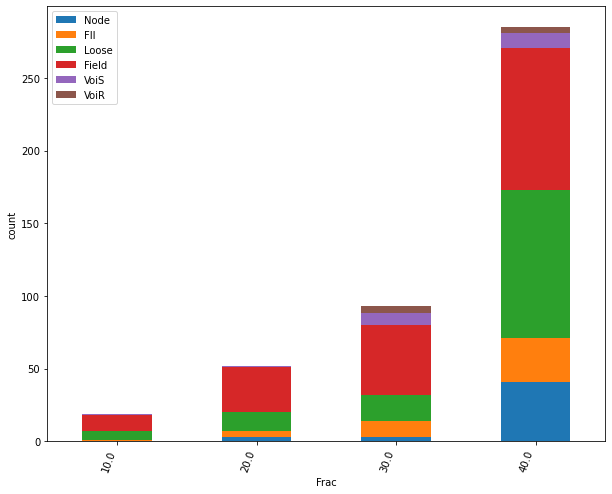

In [55]:
#my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_22)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12_22.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=70, ha="right")
#plt.xlim(0., 0.4)
#plt.savefig('cg1222.eps',format='eps')

(array([0, 1, 2, 3]),
 [Text(0, 0, '[0 - 0.25)'),
  Text(1, 0, '[0.25 - 0.5)'),
  Text(2, 0, '[0.5 - 0.75)'),
  Text(3, 0, '[0.75 - 1]')])

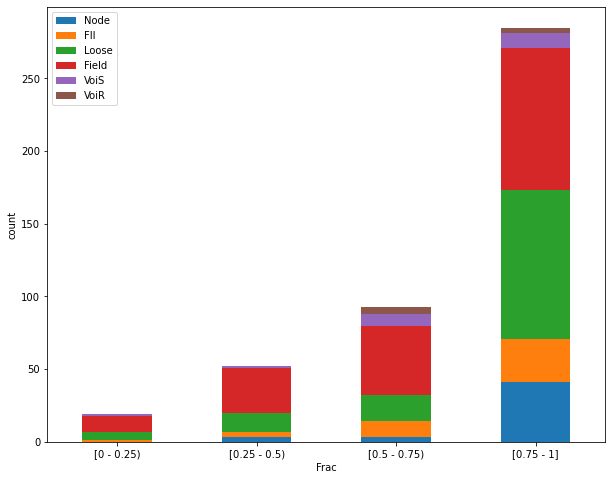

In [56]:
#my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_22)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_fracciones_bin.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=0)
#plt.xlim(0., 0.4)
#plt.savefig('cg1222.eps',format='eps')

In [57]:
df_frac_bin_nor_bar = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=1)
df_frac_bin_nor_bar

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.000000,0.052632,0.315789,0.578947,0.052632,0.000000
[0.25 - 0.5),0.057692,0.076923,0.250000,0.596154,0.019231,0.000000
[0.5 - 0.75),0.032258,0.118280,0.193548,0.516129,0.086022,0.053763
[0.75 - 1],0.143860,0.105263,0.357895,0.343860,0.035088,0.014035


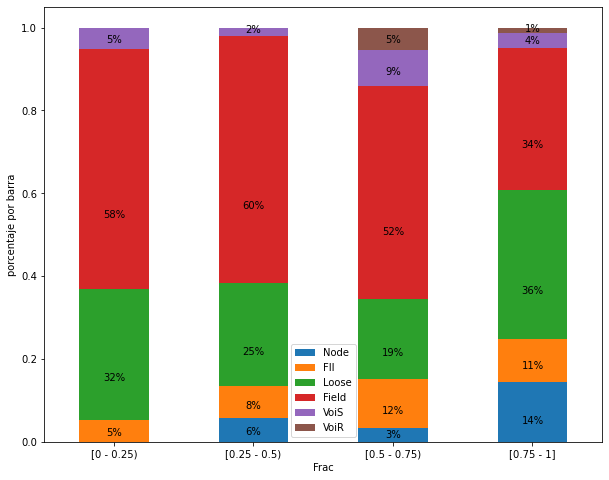

In [58]:
ax = df_frac_bin_nor_bar.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('porcentaje por barra')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*0.30), ha='center')

#plt.savefig('df_frac_bin_nor_bar.eps',format='eps')

In [59]:
df_frac_bin_nor_env = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=0)
df_frac_bin_nor_env

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.00000,0.021739,0.043165,0.058511,0.05,0.000000
[0.25 - 0.5),0.06383,0.086957,0.093525,0.164894,0.05,0.000000
[0.5 - 0.75),0.06383,0.239130,0.129496,0.255319,0.40,0.555556
[0.75 - 1],0.87234,0.652174,0.733813,0.521277,0.50,0.444444


https://www.webucator.com/article/python-color-constants-module/

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

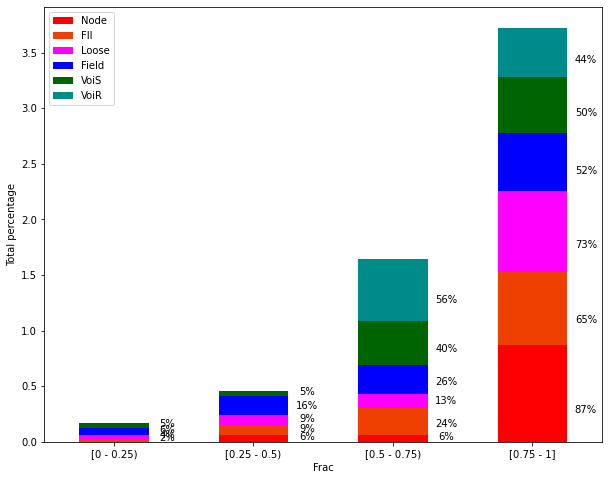

In [60]:

plt.figure(figsize=(5,5))

my_pal = {"Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=True, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/0.79, y + height*0.30), ha='center')
    
plt.savefig('df_frac_bin_nor_env.eps',format='eps')

In [61]:
df_frac_bin_nor_env

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.00000,0.021739,0.043165,0.058511,0.05,0.000000
[0.25 - 0.5),0.06383,0.086957,0.093525,0.164894,0.05,0.000000
[0.5 - 0.75),0.06383,0.239130,0.129496,0.255319,0.40,0.555556
[0.75 - 1],0.87234,0.652174,0.733813,0.521277,0.50,0.444444


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

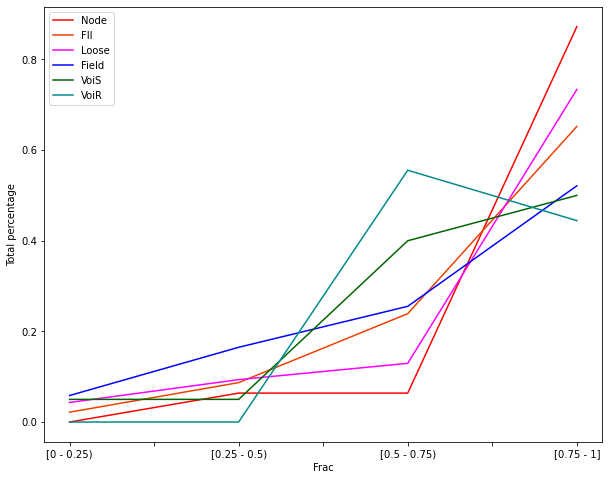

In [62]:
plt.figure(figsize=(5,5))

my_pal = {"Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='line', stacked=False, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/0.79, y + height*0.30), ha='center')
    
plt.savefig('df_frac_bin_nor_env.eps',format='eps')

In [63]:
df_frac_bin_nor_env.rename(columns = {"Node":"N","FIl":"F", "Loose":"L", "Field":"NE", "VoiS":"VS", "VoiR":"VR"}, inplace = True)

In [76]:
df_frac_bin_nor_env.to_csv('frac_red.csv', index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

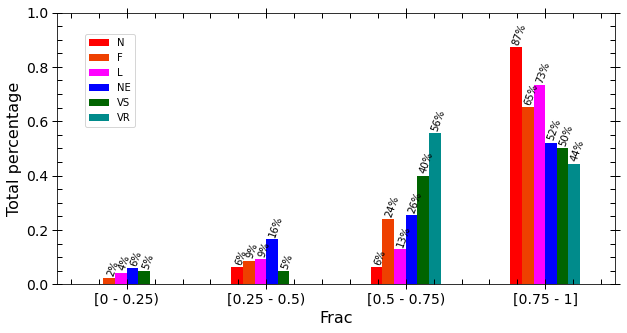

In [74]:
plt.rcParams['figure.figsize'] = 10, 5
plt.figure(figsize=(5,5))

my_pal = {"N":"red","F":"Orange", "L":"Magenta", "NE":"blue", "VS":"Darkgreen", "VR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=False, color=color)


#ax.tick_params(axis='both', which='minor', direction='in')
# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect

#left=None, bottom=None, right=None, top=None
ax.yaxis.get_ticklocs(minor=True)     # []
ax.xaxis.get_ticklocs(minor=True)     # []

ax.tick_params(bottom = True, labelbottom = True, 
               top = True, labeltop = False,
               right = True, labelright = False, 
               left = True, labelleft = True)

ax.tick_params(bottom=True, top=True, left=True, right=True,
               which='minor', direction='in', 
               length=5, width=1, colors='black',
               grid_color='r', grid_alpha=0.5)

ax.tick_params(which='major', direction='inout', 
               length=10, width=1, colors='black',
               grid_color='r', grid_alpha=0.5)


# Initialize minor ticks
ax.minorticks_on()

# Tamaño
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


plt.xlabel('Frac', fontsize=16)
plt.ylabel('Total percentage', fontsize=16)
plt.xticks(rotation=0)
plt.ylim(0, 1)


# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=True)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width*0.8, y + height+0.01), ha='center', rotation=70)

plt.legend(loc=[0.05, 0.58])
plt.savefig('df_frac_bin_nor_env.eps',format='eps')

In [75]:
pwd

'/home/vdaza/compact_goups_Nov/plots/void/tipo_de_void'

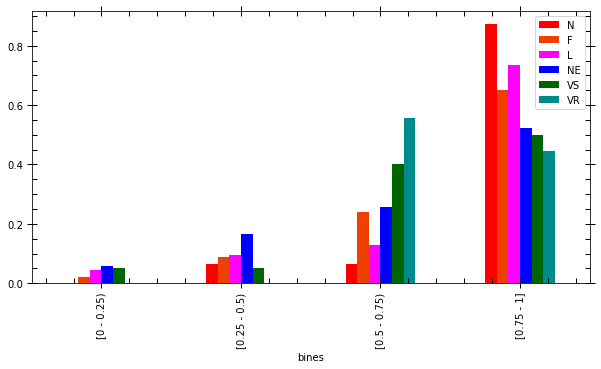

In [66]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
#plt.plot([1,2])
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=False, color=color)

# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect

#left=None, bottom=None, right=None, top=None
ax.yaxis.get_ticklocs(minor=True)     # []
ax.xaxis.get_ticklocs(minor=True)     # []

ax.tick_params(bottom = True, labelbottom = True, 
               top = True, labeltop = False,
               right = True, labelright = False, 
               left = True, labelleft = True)

ax.tick_params(bottom=True, top=True, left=True, right=True,
               which='minor', direction='in', 
               length=5, width=1, colors='black',
               grid_color='r', grid_alpha=0.5)

ax.tick_params(which='major', direction='inout', 
               length=10, width=1, colors='black',
               grid_color='r', grid_alpha=0.5)


# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=True)


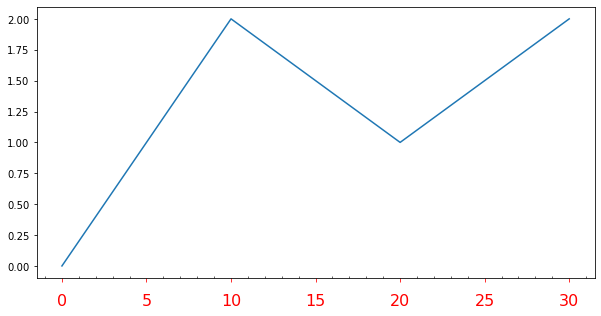

In [67]:

# importing libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
  
fig, ax = plt.subplots()
ax.plot([0, 10, 20, 30], [0, 2, 1, 2])
#ax = df_frac_bin_nor_env.plot(kind='bar', stacked=False, color=color)
  
ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.xaxis.set_minor_formatter(ScalarFormatter())
  
ax.tick_params(axis ='x', which ='major', 
               labelsize = 16, pad = 12, 
               colors ='r')
  
ax.tick_params(axis ='x', which ='minor',
               labelsize =16, colors ='black', direction='in')
  
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

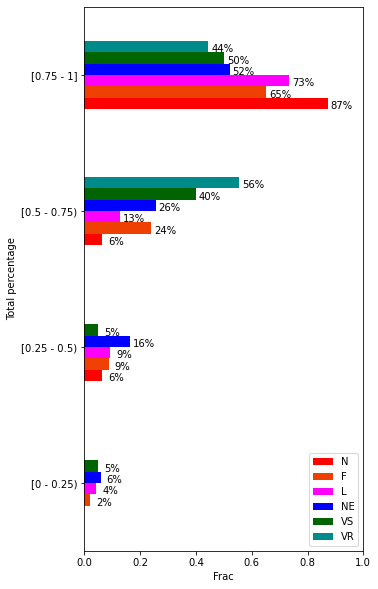

In [68]:
plt.rcParams['figure.figsize'] = 5, 10
plt.figure(figsize=(5,5))

#plt.figure(figsize=(5,5))

my_pal = {"N":"red","F":"Orange", "L":"Magenta", "NE":"blue", "VS":"Darkgreen", "VR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='barh', stacked=False, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
plt.xlim(0, 1)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if width == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{width:.0%}', (x+width+0.05, y), ha='center', rotation=0)

plt.legend(loc="lower right")
plt.savefig('df_frac_bin_nor_env2.eps',format='eps')

In [69]:
!pwd

/home/vdaza/compact_goups_Nov/plots/void/tipo_de_void


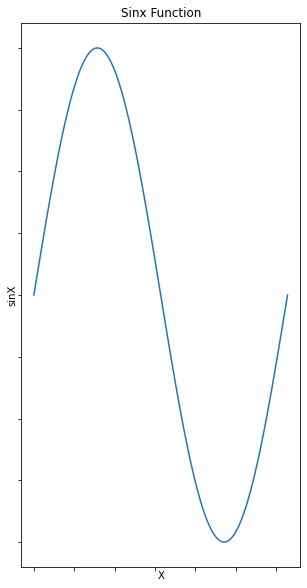

In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt 

x=np.linspace(0,2*math.pi,100)
y=np.sin(x)

fig, axes=plt.subplots(1,1)

axes.plot(x, y)
for i, tick in enumerate(axes.xaxis.get_ticklabels()):
    if i % 100 != 0:
        tick.set_visible(False)
for i, tick in enumerate(axes.yaxis.get_ticklabels()):
    if i % 100 != 0:
        tick.set_visible(False)        
axes.set_title("Sinx Function")
axes.set_xlabel("X")
axes.set_ylabel("sinX")
plt.show()

In [71]:
cgR=cgF1[cgF1['tipo_vv']==0]
display(cgR.shape)
cgR.dij_N.describe()

NameError: name 'cgF1' is not defined

In [ ]:
df_fracciones_bin

In [ ]:
!pwd